In [1]:
pip install openpyxl


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl

In [3]:
dataset = pd.read_excel("D:\\dataset\\Superstore_USA.xlsx")

In [4]:
dataset.shape

(9426, 24)

In [5]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


finding missing data value is first step

In [6]:
dataset['Discount'].isnull().sum()

0

In [7]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [8]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(), inplace = True)

# order of priority


In [9]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [10]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [11]:
dataset['Order Priority'].replace('Critical ','Critical',inplace= True)

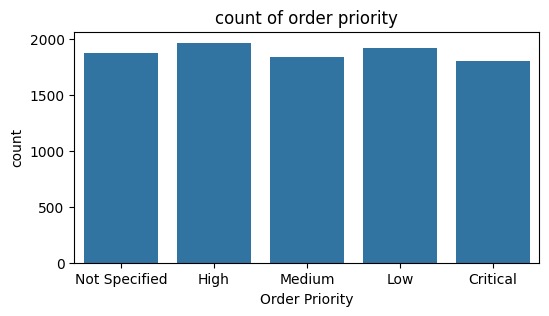

In [12]:

plt.figure(figsize=(6,3))
sns.countplot(x='Order Priority',data = dataset)
plt.title("count of order priority")
plt.savefig("count of order priority.jpg")
plt.show()

# shipping mode


In [13]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [14]:
x= dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

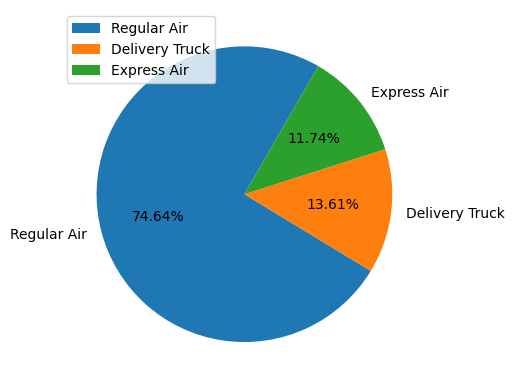

In [16]:
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc = 2)
plt.show()

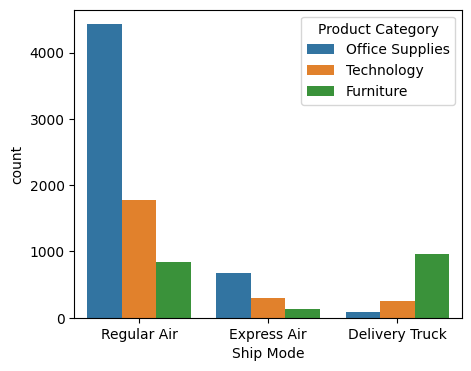

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data = dataset,hue = "Product Category")
plt.show()

# Customer Segment

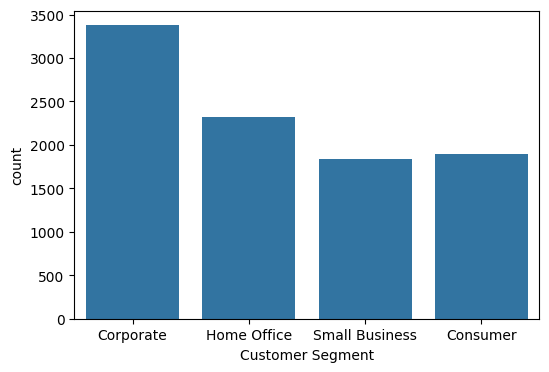

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x= "Customer Segment" , data=dataset)
plt.show()

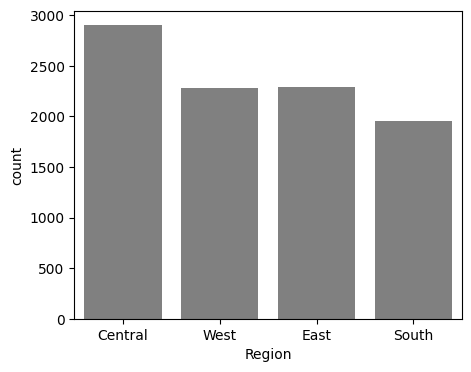

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x="Region",data=dataset,color='grey')
plt.show()

# Product category

In [28]:
dataset["Product Category"].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

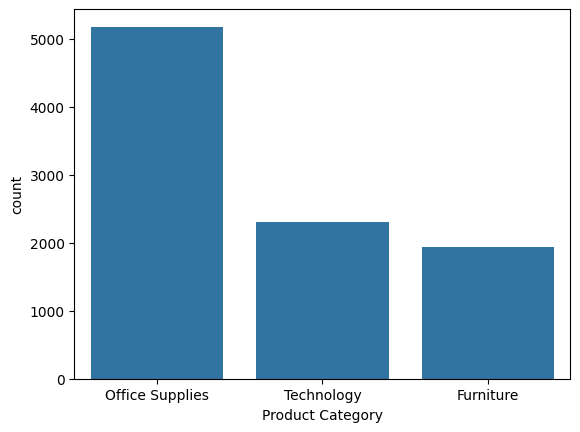

In [29]:
sns.countplot(x="Product Category",data= dataset)
plt.show()

In [30]:
dataset['Product Sub-Category'].value_counts()

Product Sub-Category
Paper                             1379
Binders and Binder Accessories    1028
Telephones and Communication       992
Office Furnishings                 883
Computer Peripherals               846
Pens & Art Supplies                721
Storage & Organization             610
Appliances                         492
Chairs & Chairmats                 440
Tables                             404
Office Machines                    376
Labels                             329
Envelopes                          272
Bookcases                          206
Rubber Bands                       195
Scissors, Rulers and Trimmers      155
Copiers and Fax                     98
Name: count, dtype: int64

In [31]:
dataset['Product Sub-Category'].value_counts().index

Index(['Paper', 'Binders and Binder Accessories',
       'Telephones and Communication', 'Office Furnishings',
       'Computer Peripherals', 'Pens & Art Supplies', 'Storage & Organization',
       'Appliances', 'Chairs & Chairmats', 'Tables', 'Office Machines',
       'Labels', 'Envelopes', 'Bookcases', 'Rubber Bands',
       'Scissors, Rulers and Trimmers', 'Copiers and Fax'],
      dtype='object', name='Product Sub-Category')

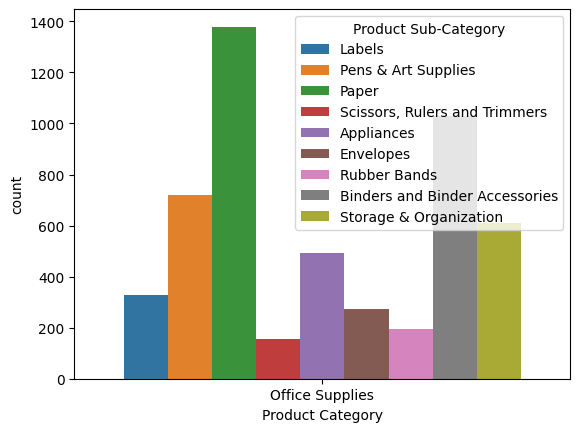

In [42]:
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Office Supplies'], hue ='Product Sub-Category' )
plt.show()

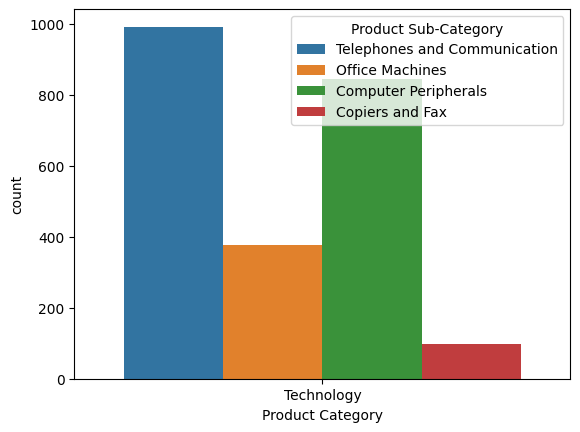

In [43]:
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Technology'], hue ='Product Sub-Category' )
plt.show()

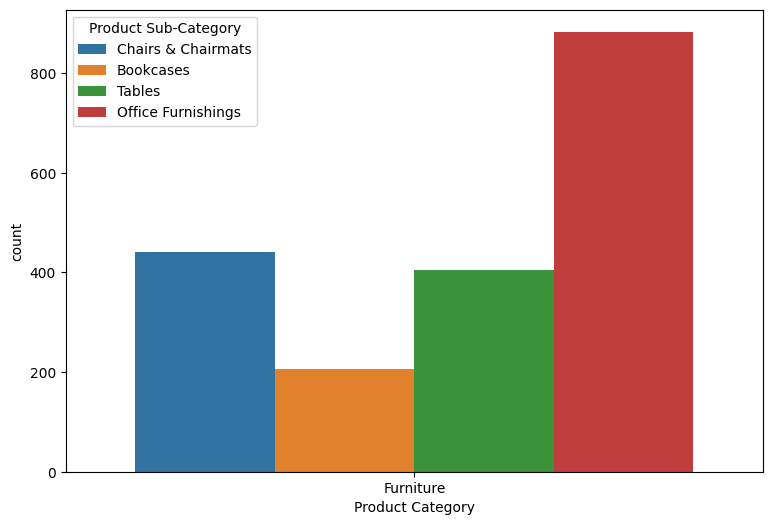

In [45]:
plt.figure(figsize=(9,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Furniture'], hue ='Product Sub-Category' )
plt.show()

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [51]:
dataset['Order year']=dataset['Order Date'].dt.year

In [52]:
dataset['Order year']

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order year, Length: 9426, dtype: int32

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [55]:
dataset.drop('year', axis=1, inplace=True)

In [58]:
dataset['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

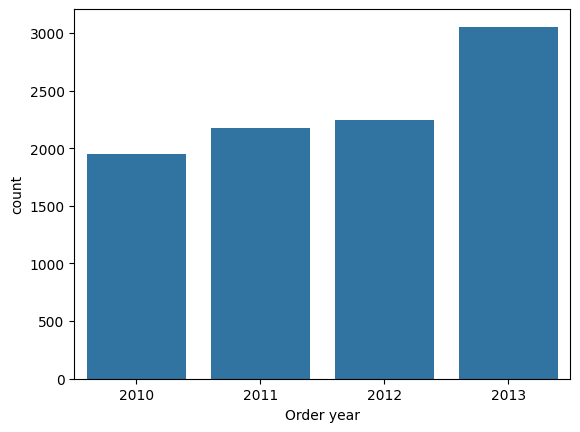

In [60]:
sns.countplot(x="Order year" ,data=dataset)
plt.show()

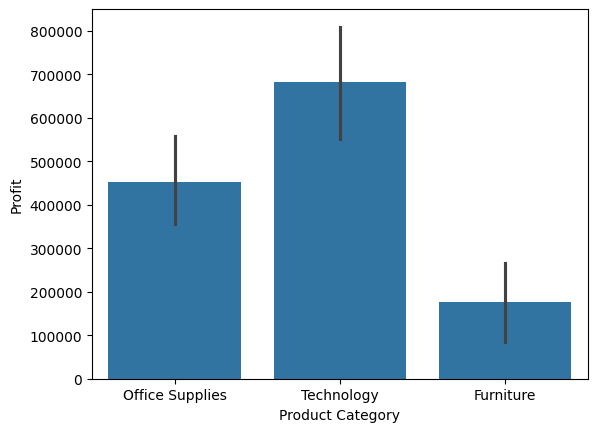

In [64]:
sns.barplot(x='Product Category', y='Profit',data=dataset,estimator=sum)
plt.show()

In [66]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64